# Ensemble - Boosting Model
부스팅(Boosting)이란 단순하고 약한 학습기(Weak Learner)들를 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만드는 방식.  
정확도가 낮은 하나의 모델을 만들어 학습 시킨뒤, 그 모델의 예측 오류는 두 번째 모델이 보완한다. 이 두 모델을 합치면 처음보다는 정확한 모델이 만들어 진다. 합쳐진 모델의 예측 오류는 다음 모델에서 보완하여 계속 더하는 과정을 반복한다. 즉 **약한 학습기들은 앞 학습기가 만든 오류를 줄이는 방향으로 학습한다**

# GradientBoosting
- 개별 모델로 Decision Tree 를 사용한다. 
- depth가 깊지 않은 트리를 많이 연결해서 이전 트리의 오차를 보정해 나가는 방식으로 실행한다.
- 각 모델들은 앞의 모델이 틀린 오차를 학습하여 전체 오차가 줄어들드록 학습한다.
- 얕은 트리를 많이 연결하여 각각의 트리가 데이터의 일부에 대해 예측을 잘 수행하도록 하고 그런 트리들이 모여 전체 성능을 높이는 것이 기본 아이디어.
- 분류와 회귀 둘다 지원하는 모델 (GradientBoostingClassifier, GrandientBoostingRegressor)
- 훈련시간이 많이 걸리고, 트리기반 모델의 특성상 희소한 고차원 데이터에서는 성능이 안 좋은 단점이 있다.

## GradientBoosting 학습 및 추론 프로세스

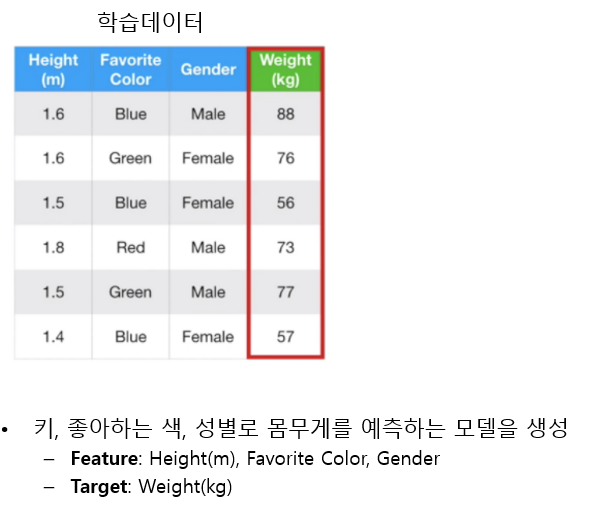

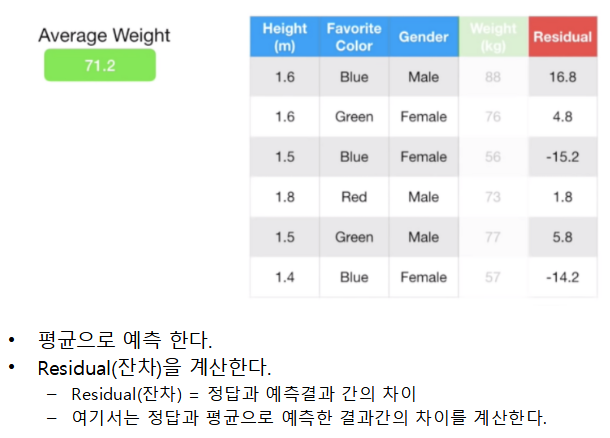

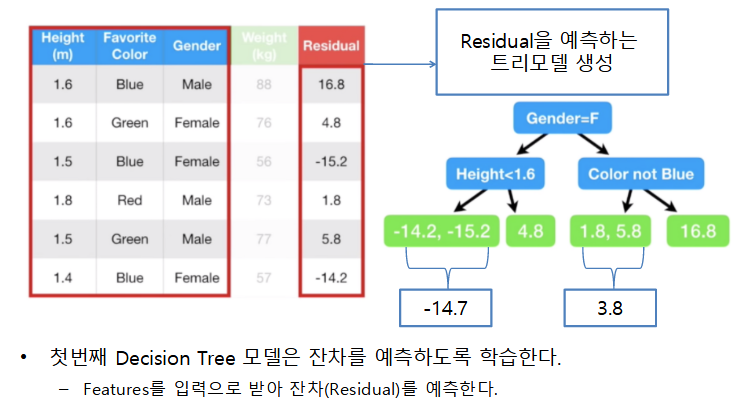

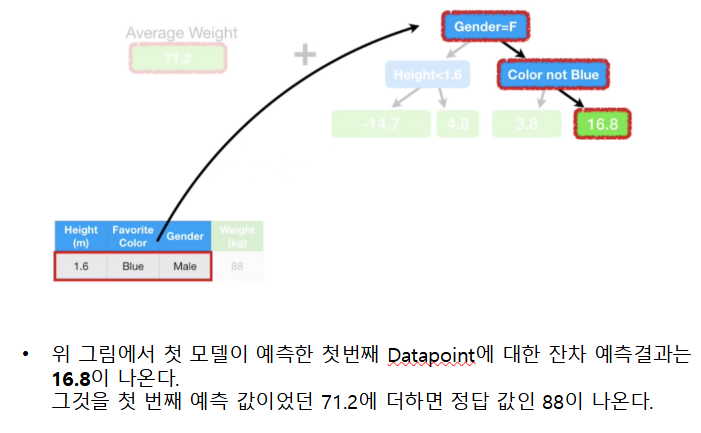

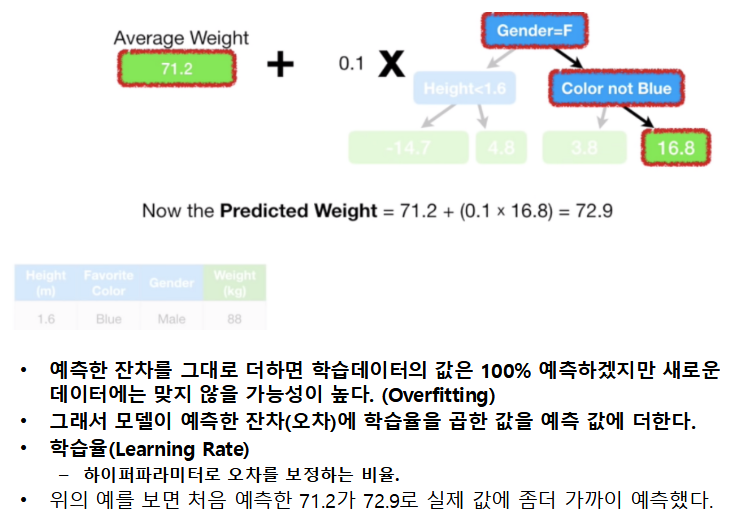

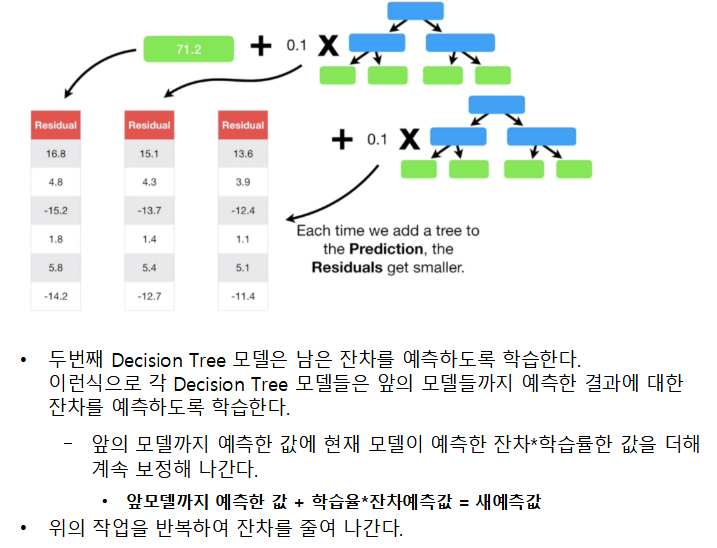

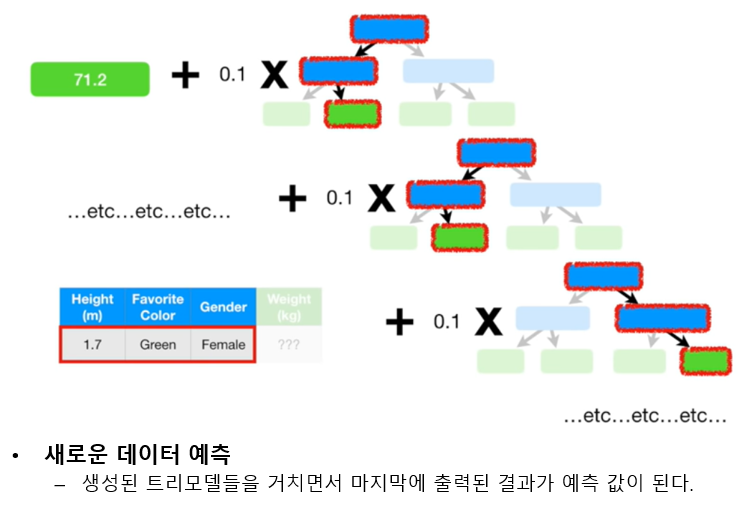

이미지 참조: https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=49

### 주요 파라미터
- **Decision Tree 의 가지치기 관련 매개변수**
    - 각각의 decision tree가 복잡한 모델이 되지 않도록 한다. 

- **learning rate**
    - 이전 decision tree의 오차를 얼마나 강하게 보정할 것인지 제어하는 값. 
    - 값이 크면 보정을 강하게 하여 복잡한 모델을 만든다. 학습데이터의 정확도는 올라가지만 과대적합이 날 수있다. 
    - 값을 작게 잡으면 보정을 약하게 하여 모델의 복잡도를 줄인다. 과대적합을 줄일 수 있지만 성능 자체가 낮아질 수있다.
    - 기본값 : 0.1

- **n_estimators**
    - decision tree의 개수 지정. 많을 수록 복잡한 모델이 된다.

- **n_iter_no_change, validation_fraction**
    - validation_fraction에 지정한 비율만큼 n_iter_no_change에 지정한 반복 횟수동안 검증점수가 좋아 지지 않으면 훈련을 조기 종료한다.

- **보통 max_depth를 낮춰 개별 decision tree의 복잡도를 낮춘다. 보통 5가 넘지 않게 설정한다. 그리고 n_estimators를 가용시간, 메모리 한도에 맞춰 크게 설정하고 적절한 learning_rate을 찾는다.**

### 위스콘신 유방암 데이터

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

##### GradientBoostingClassifier 모델 생성, 학습, 평가

In [3]:
GradientBoostingClassifier?

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)

train_pred = gb.predict(X_train)
test_pred = gb.predict(X_test)

train_proba = gb.predict_proba(X_train)[:, 1]
test_proba = gb.predict_proba(X_test)[:, 1]

In [7]:
# 평가
from metrics import (print_metrics_classification as pmc1,
                     print_metrics_classification2 as pmc2)

pmc1(y_train, train_pred, 'train set')
print('='* 100)
pmc1(y_test, test_pred, 'test set')

train set
정확도(accuracy): 1.0
재현율/민감도(recall): 1.0
정밀도(precision): 1.0
F1-score: 1.0
test set
정확도(accuracy): 0.958041958041958
재현율/민감도(recall): 0.9555555555555556
정밀도(precision): 0.9772727272727273
F1-score: 0.9662921348314608


In [9]:
pmc2(y_train, train_proba, 'train set')
print("="* 50)
pmc2(y_test, test_proba, 'test set')

train set
Average Precision: 1.0
roc_auc: 1.0
test set
Average Precision: 0.9741338688529869
roc_auc: 0.9776729559748428


##### Feature 중요도를 조회

In [12]:
import pandas as pd
pd.Series(gb.feature_importances_).sort_values(ascending=False)

22    0.495177
27    0.162170
20    0.130348
7     0.075636
21    0.043937
23    0.020648
13    0.013646
1     0.012091
26    0.009068
17    0.008011
11    0.006192
24    0.004647
15    0.004171
28    0.003383
10    0.002706
6     0.002310
8     0.001918
25    0.001776
14    0.001359
0     0.000240
2     0.000179
16    0.000160
3     0.000079
12    0.000061
18    0.000034
5     0.000026
29    0.000014
9     0.000009
4     0.000005
19    0.000000
dtype: float64

### learning rate 변화에 따른 성능 변화

In [25]:
max_depth=1 # 기본: 3 -> 1 (좀더 단순한 모델들.=> 각각의 DT)
n_estimators=10000 # 기본: 100 -> 1000 (복잡한 모델 => GB)
lr = 0.0001  # 학습율 값-기본: 0.1 train: 0.6267, test: 0.6293
# lr = 0.001   # train: 0.9413 , test: 0.916
# lr = 0.01    # train: 0.9953, test: 0.9580
# lr = 0.1     # train: 1, test: 0.9580
# lr = 0.5     # train: 1, test: 0.961
gb2 = GradientBoostingClassifier(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 learning_rate=lr, 
                                 random_state=0)
gb2.fit(X_train, y_train)

train_pred2 = gb2.predict(X_train)
test_pred2 = gb2.predict(X_test)


In [26]:
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print("========================")
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.0001
정확도(accuracy): 0.9413145539906104
재현율/민감도(recall): 0.9887640449438202
정밀도(precision): 0.9230769230769231
F1-score: 0.9547920433996384
Test, LR: 0.0001
정확도(accuracy): 0.916083916083916
재현율/민감도(recall): 0.9888888888888889
정밀도(precision): 0.89
F1-score: 0.9368421052631579


In [16]:
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print("========================")
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.001
정확도(accuracy): 0.9413145539906104
재현율/민감도(recall): 0.9887640449438202
정밀도(precision): 0.9230769230769231
F1-score: 0.9547920433996384
Test, LR: 0.001
정확도(accuracy): 0.916083916083916
재현율/민감도(recall): 0.9888888888888889
정밀도(precision): 0.89
F1-score: 0.9368421052631579


In [18]:
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print("========================")
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.01
정확도(accuracy): 0.9953051643192489
재현율/민감도(recall): 1.0
정밀도(precision): 0.9925650557620818
F1-score: 0.9962686567164178
Test, LR: 0.01
정확도(accuracy): 0.958041958041958
재현율/민감도(recall): 0.9666666666666667
정밀도(precision): 0.9666666666666667
F1-score: 0.9666666666666667


In [20]:
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print("========================")
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.1
정확도(accuracy): 1.0
재현율/민감도(recall): 1.0
정밀도(precision): 1.0
F1-score: 1.0
Test, LR: 0.1
정확도(accuracy): 0.958041958041958
재현율/민감도(recall): 0.9555555555555556
정밀도(precision): 0.9772727272727273
F1-score: 0.9662921348314608


In [22]:
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print("========================")
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.5
정확도(accuracy): 1.0
재현율/민감도(recall): 1.0
정밀도(precision): 1.0
F1-score: 1.0
Test, LR: 0.5
정확도(accuracy): 0.965034965034965
재현율/민감도(recall): 0.9666666666666667
정밀도(precision): 0.9775280898876404
F1-score: 0.9720670391061451


### GridSearchCV 이용해 최적의 하이퍼파라미터 찾기

##### RandomizedSearchCV 생성
- n_estimators
- learning_rate
- max_depth
- subsample

In [27]:
5*5*3*6

450

In [29]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators":[1000, 2000, 3000, 4000, 5000],
    "learning_rate":[0.001, 0.01, 0.05, 0.1, 0.5],
    "max_depth":[1, 2, 3], 
    "subsample":[0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
rs = RandomizedSearchCV(GradientBoostingClassifier(random_state=0), 
                       params, 
                       cv=4, 
                       n_iter=60, # 전체 HP 조합중 임의의 60개 조합만 테스트
                       n_jobs=-1, 
                       scoring='accuracy'
                       )

In [30]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.5],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [1000, 2000, 3000, 4000,
                                                         5000],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   scoring='accuracy')

In [31]:
# 결과
rs.best_params_

{'subsample': 0.5, 'n_estimators': 4000, 'max_depth': 1, 'learning_rate': 0.01}

In [32]:
rs.best_score_

0.9718744489508023

In [33]:
pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        9.815789      0.861761         0.005429        0.000262   
33       4.354884      0.348638         0.006040        0.001693   
46       8.734163      0.229750         0.005726        0.000786   
15      25.940044      1.310404         0.015674        0.002565   
19       4.695345      0.981500         0.004046        0.001708   

   param_subsample param_n_estimators param_max_depth param_learning_rate  \
2              0.5               4000               1                0.01   
33             0.6               1000               2                 0.1   
46             0.7               4000               2                 0.1   
15             0.6               4000               3                0.01   
19             0.6               2000               1                 0.5   

                                               params  split0_test_score  \
2   {'subsample': 0.5, 'n_estimators': 4000, 'max_...           0.943925   
33  {'subsample': 0.6, 'n_estimators': 1000, 'max_...           0.953271   
46  {'subsample': 0.7, 'n_estimators': 4000, 'max_...           0.953271   
15  {'subsample': 0.6, 'n_estimators': 4000, 'max_...           0.953271   
19  {'subsample': 0.6, 'n_estimators': 2000, 'max_...           0.953271   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
2            0.981308           0.971698           0.990566         0.971874   
33           0.971963           0.981132           0.981132         0.971874   
46           0.971963           0.981132           0.981132         0.971874   
15           0.971963           0.981132           0.981132         0.971874   
19           0.981308           0.971698           0.981132         0.971852   

    std_test_score  rank_test_score  
2         0.017461                1  
33        0.011374                2  
46        0.011374                2  
15        0.011374                2  
19        0.011411                5

##### Feature importance

In [34]:
best_model = rs.best_estimator_
fi = pd.Series(best_model.feature_importances_)

In [35]:
fi.sort_values(ascending=False)

27    0.264667
22    0.248308
7     0.142900
23    0.123584
20    0.087294
21    0.024815
6     0.023936
28    0.013724
13    0.011714
26    0.010607
11    0.010016
24    0.008788
8     0.007660
1     0.007345
14    0.004895
29    0.002686
9     0.002503
18    0.001679
19    0.000835
10    0.000714
15    0.000579
16    0.000419
4     0.000091
17    0.000088
25    0.000055
12    0.000047
2     0.000024
3     0.000022
5     0.000004
0     0.000000
dtype: float64

# XGBoost(Extra Gradient Boost)
- https://xgboost.readthedocs.io/ 
- Gradient Boost 알고리즘을 기반으로 개선해서 분산환경에서도 실행할 수 있도록 구현 나온 모델.
- Gradient Boost의 단점인 느린수행시간을 해결하고 과적합을 제어할 수 있는 규제들을 제공하여 성능을 높임.
- 회귀와 분류 모두 지원한다.
- 캐글 경진대회에서 상위에 입상한 데이터 과학자들이 사용한 것을 알려져 유명해짐.
- 두가지 개발 방법
    - [Scikit-learn 래퍼 XGBoost 모듈 사용](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
    - [파이썬 래퍼 XGBoost 모듈 사용](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.training)
- 설치
    - conda install -y -c anaconda py-xgboost   
    - pip install xgboost


In [36]:
import xgboost

## Scikit-learn 래퍼 XGBoost
- XGBoost를 Scikit-learn프레임워크와 연동할 수 있도록 개발됨.
- Scikit-learn의 Estimator들과 동일한 패턴으로 코드를 작성할 수 있다.
- GridSearchCV나 Pipeline 등 Scikit-learn이 제공하는 다양한 유틸리티들을 사용할 수 있다.
- XGBClassifier: 분류
- XGBRegressor : 회귀 

### 주요 매개변수
- learning_rate : 학습률, 보통 0.01 ~ 0.2 사이의 값 사용
- n_estimators : week tree 개수
- Decision Tree관련 하이퍼파라미터들

### 예제

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=2, random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

##### feature importance

In [39]:
fi = pd.Series(xgb.feature_importances_)
fi.sort_values(ascending=False)

22    0.317715
7     0.191484
27    0.150696
20    0.077119
23    0.050489
11    0.037051
26    0.029967
21    0.025489
0     0.022118
13    0.016181
6     0.015403
1     0.013993
10    0.012032
8     0.011944
24    0.009557
29    0.005800
12    0.005580
28    0.005041
18    0.002342
16    0.000000
17    0.000000
19    0.000000
14    0.000000
9     0.000000
5     0.000000
4     0.000000
25    0.000000
3     0.000000
2     0.000000
15    0.000000
dtype: float32

In [41]:
pmc1(y_train, xgb.predict(X_train))

정확도(accuracy): 0.9953051643192489
재현율/민감도(recall): 0.9962546816479401
정밀도(precision): 0.9962546816479401
F1-score: 0.9962546816479401


In [42]:
pmc1(y_test, xgb.predict(X_test))

정확도(accuracy): 0.951048951048951
재현율/민감도(recall): 0.9555555555555556
정밀도(precision): 0.9662921348314607
F1-score: 0.9608938547486034
